# Machine learning 2025 Student Exam Evaluation


Initialize imports

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

Load the data and drop unnecessary columns and rows with missing values

In [25]:
df = pd.read_csv('StudentPerformanceFactors.csv')
df.drop(columns=[
    'Parental_Involvement',
    'Access_to_Resources',
    'Extracurricular_Activities',
    'Motivation_Level', 
    'Internet_Access',
    'Family_Income',
    'Teacher_Quality',
    'School_Type',
    'Peer_Influence',
    'Learning_Disabilities',
    'Parental_Education_Level',
    'Distance_from_Home',
    'Gender'
], inplace=True)  # drop unrelevant columns
df.dropna(inplace=True) # drop rows with missing values
df.head(5)

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,23,84,7,73,0,3,67
1,19,64,8,59,2,4,61
2,24,98,7,91,2,4,74
3,29,89,8,98,1,4,71
4,19,92,6,65,3,4,70


## Data visualization of the chosen features

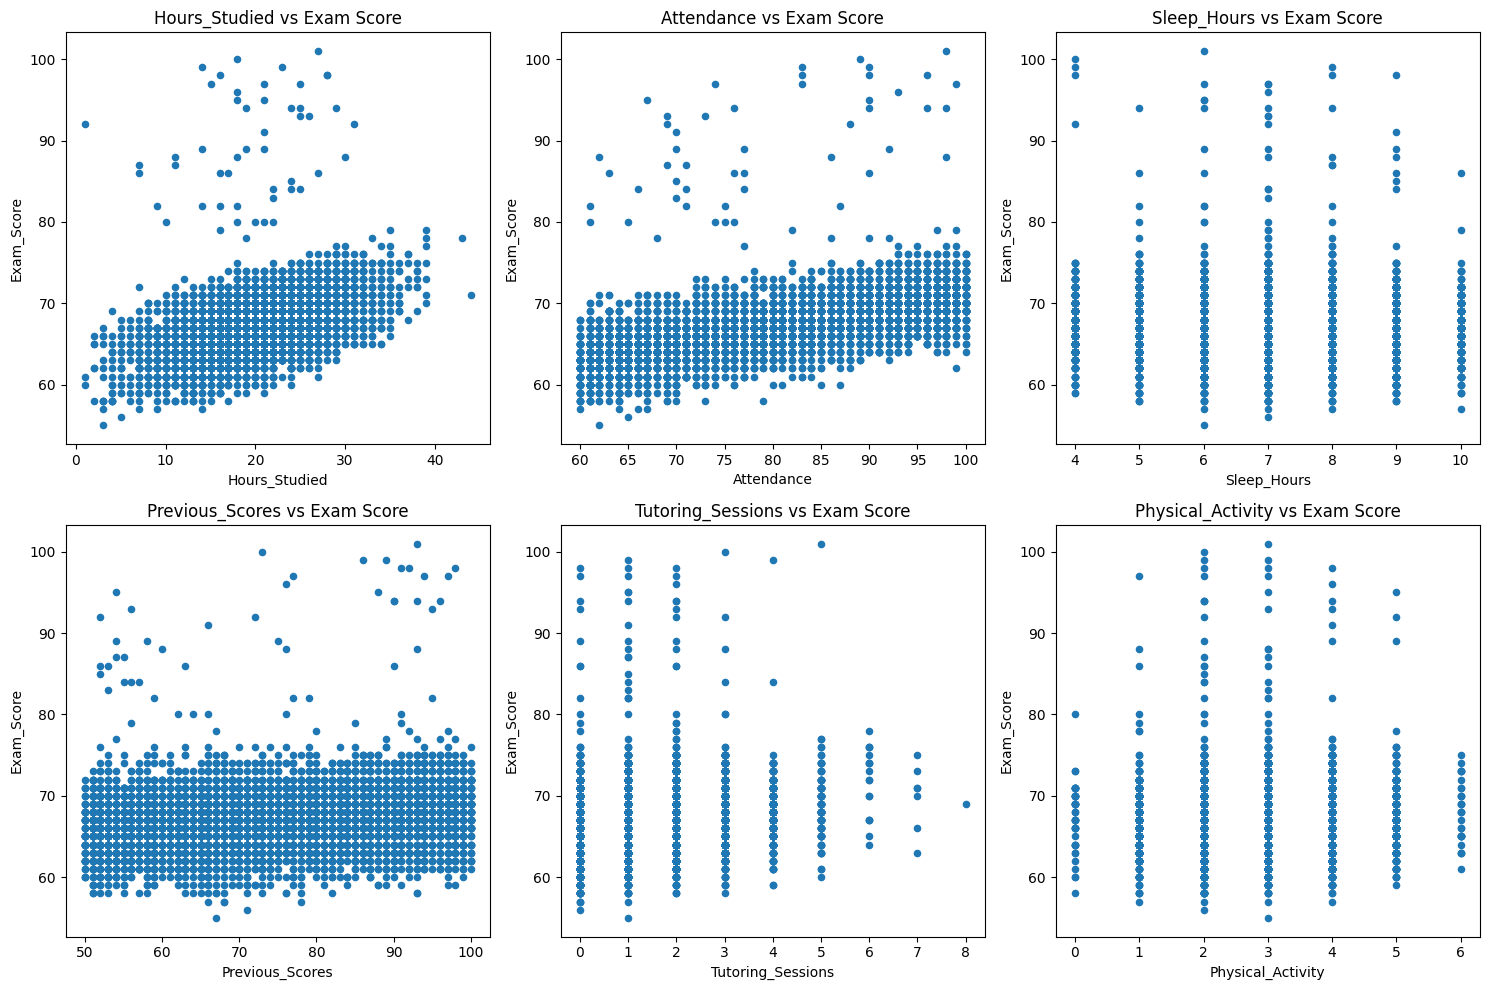

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, feature in enumerate(df.columns[:-1]):  # Exclude the target column 'Exam_Score'
    df.plot.scatter(x=feature, y='Exam_Score', ax=axes[i//3, i%3], title=f'{feature} vs Exam Score')

plt.tight_layout()
plt.show()


## Train the linear regression and Random Forest Regressor

In [27]:
X = df[df.columns[:-1]]
y = df['Exam_Score']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Size of X_train: {X_train.shape[0]}")
print(f"Size of y_train: {y_train.shape[0]}")
print(f"Size of X_val: {X_val.shape[0]}")
print(f"Size of y_val: {y_val.shape[0]}")
print(f"Size of X_test: {X_test.shape[0]}")
print(f"Size of y_test: {y_test.shape[0]}")

Size of X_train: 3964
Size of y_train: 3964
Size of X_val: 1321
Size of y_val: 1321
Size of X_test: 1322
Size of y_test: 1322


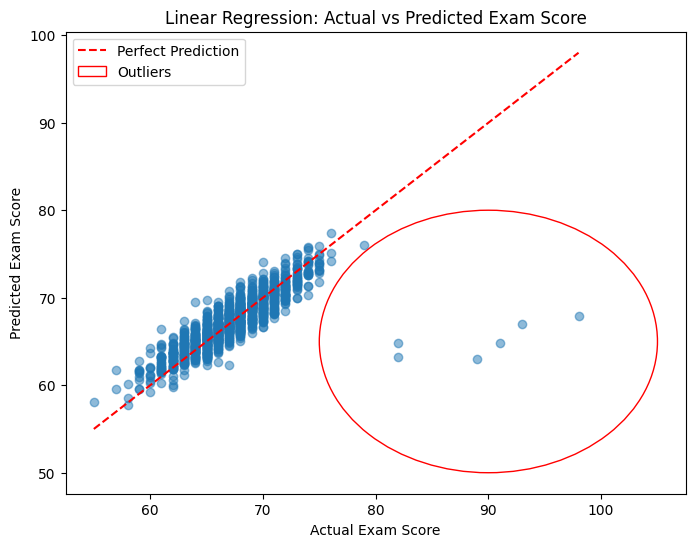

In [28]:
# Train the linear regression model and make predictions
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# For calulating training error
linear_training_prediction = linear_model.predict(X_train)
linear_training_rmse = np.sqrt(mean_squared_error(y_train, linear_training_prediction))

# For calulating validation error
linear_y_pred = linear_model.predict(X_val)

plt.figure(figsize=(8, 6))
plt.scatter(y_val, linear_y_pred, alpha=0.5)
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Linear Regression: Actual vs Predicted Exam Score')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', label='Perfect Prediction')

circle = plt.Circle((90, 65), 15, color='red', fill=False, linewidth=1, label='Outliers')
plt.gca().add_patch(circle)
plt.legend()
plt.show()



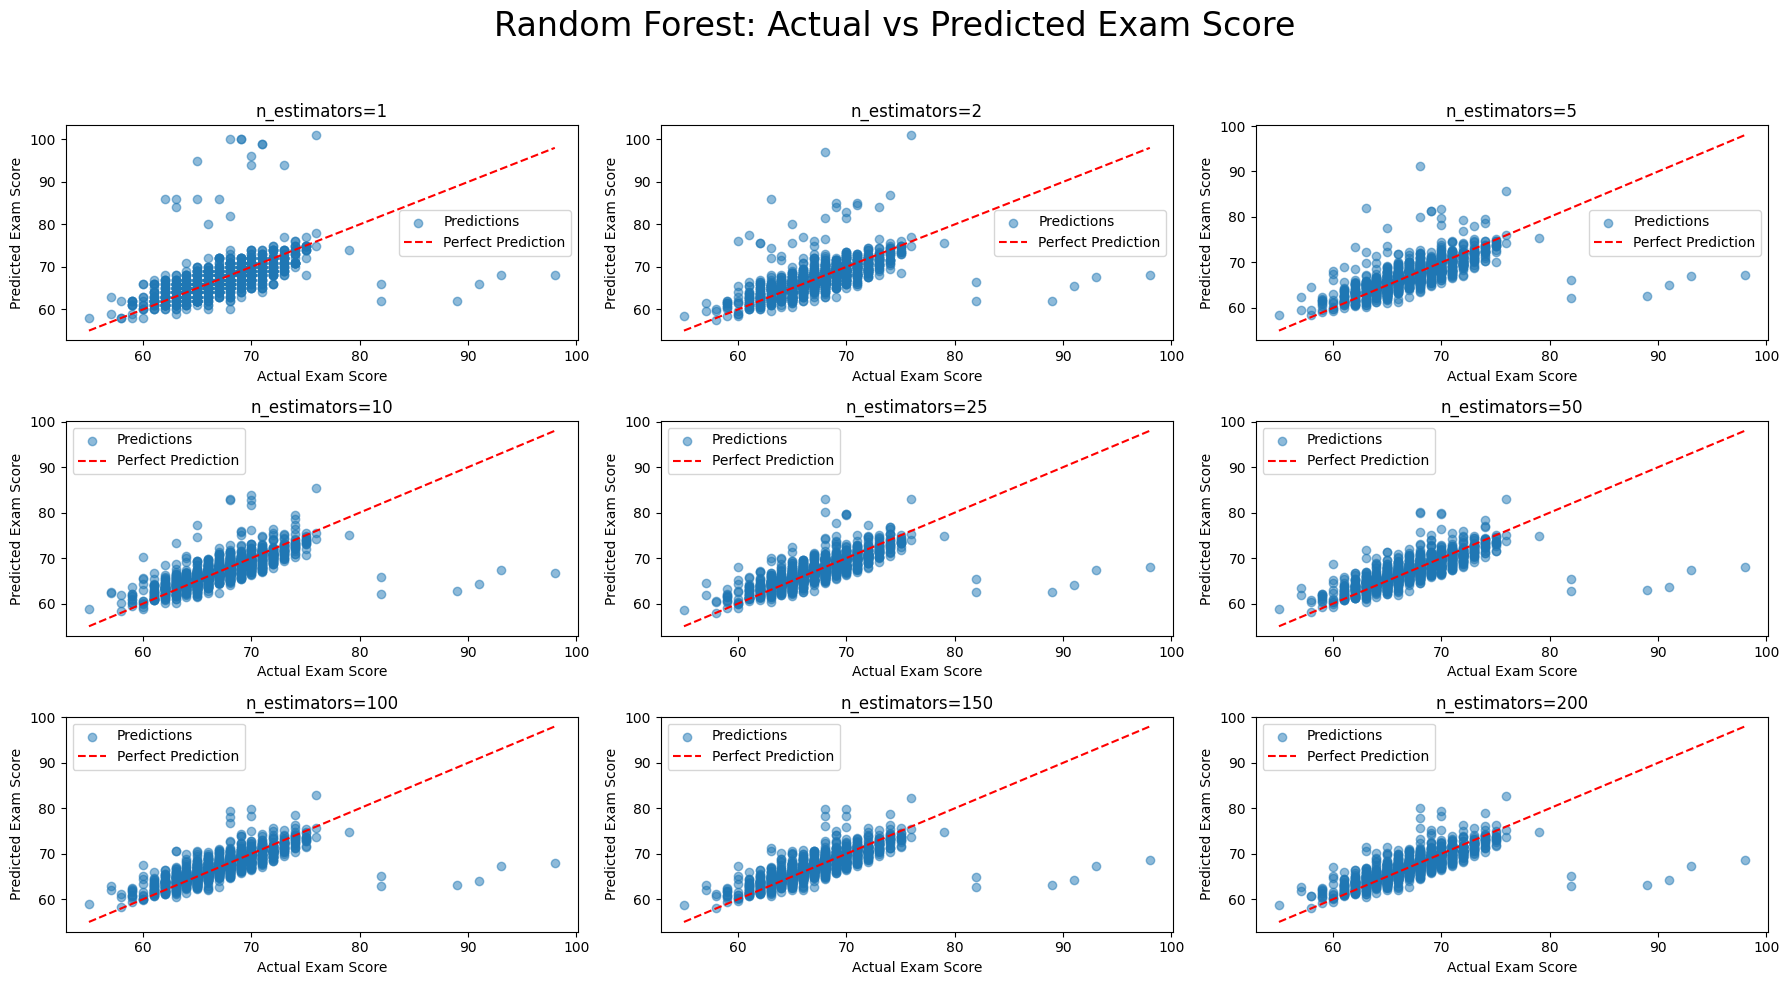

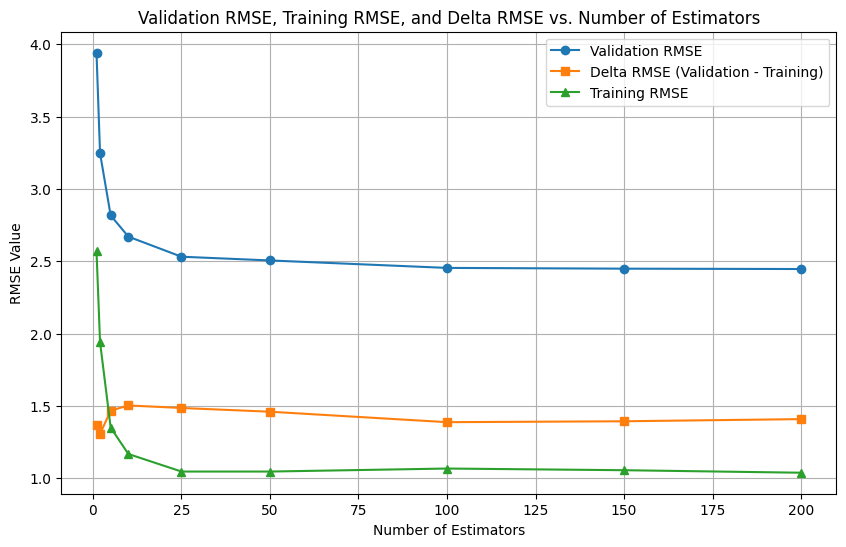

In [29]:
n_estimators_list = [1, 2, 5, 10, 25, 50, 100, 150, 200]
fig, axes = plt.subplots(3, 3, figsize=(18, 10))

training_errors = []
validation_errors = []



for idx, n in enumerate(n_estimators_list):
    rf = RandomForestRegressor(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    y_training_pred = rf.predict(X_train)

    rf_training_rmse = np.sqrt(mean_squared_error(y_train, y_training_pred))
    rf_rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    training_errors.append(rf_training_rmse)
    validation_errors.append(rf_rmse)

    ax = axes[idx // 3, idx % 3]
    ax.scatter(y_val, y_pred, alpha=0.5, label='Predictions')
    ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', label='Perfect Prediction')
    ax.set_xlabel('Actual Exam Score')
    ax.set_ylabel('Predicted Exam Score')
    ax.set_title(f'n_estimators={n}')
    ax.legend()

fig.suptitle('Random Forest: Actual vs Predicted Exam Score', fontsize=24)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

delta_errors = [val - train for val, train in zip(validation_errors, training_errors)]
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, validation_errors, marker='o', label='Validation RMSE')
plt.plot(n_estimators_list, delta_errors, marker='s', label='Delta RMSE (Validation - Training)')
plt.plot(n_estimators_list, training_errors, marker='^', label='Training RMSE')
plt.xlabel('Number of Estimators')
plt.ylabel('RMSE Value')
plt.title('Validation RMSE, Training RMSE, and Delta RMSE vs. Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()



Visual analysis of the Random Forest Regressor results indicates that increasing the number of estimators beyond 10 does not yield significant improvements in performance. 

However, with close inspectiong to errors we can see that there is an improvement up untill 100 estimators. Beyong that there seems to be no significant improvements.

A model with 100 estimators is selected as the optimal configuration for subsequent analysis.

## Calculating Error

Calculate error using root mean squared error (RMSE)



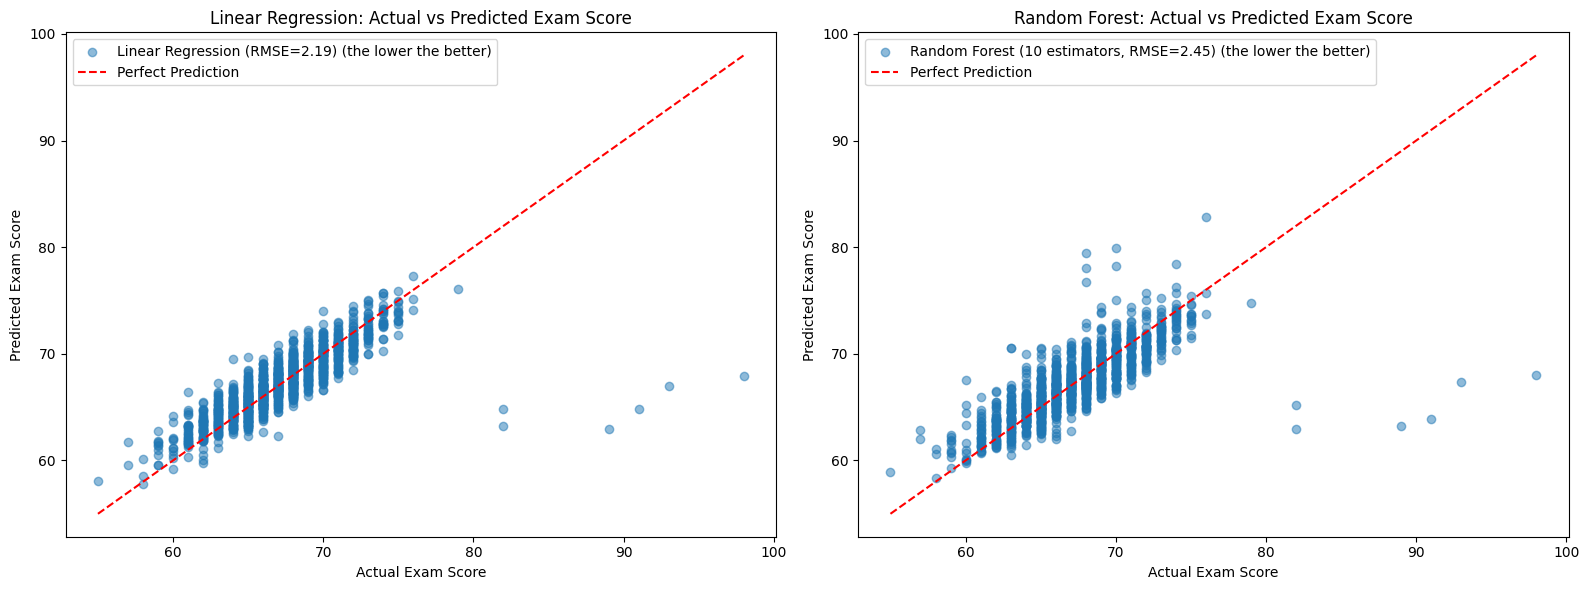

Linear Regression training RMSE: 2.5755
Random Forest training RMSE: 1.0666
Linear Regression validation RMSE: 2.1876
Random Forest validation RMSE: 2.4538
Delta error for Linear Regression: 0.3879
Delta error for Random Forest regression: 1.3872


In [30]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# For calculating the training error with the n_estimator 10 that was found to be the best above
rf_y_training_pred = rf.predict(X_train)
rf_training_rmse = np.sqrt(mean_squared_error(y_train, rf_y_training_pred))

# For calulating the validation error 
rf_y_pred = rf.predict(X_val)

linear_rmse = np.sqrt(mean_squared_error(y_val, linear_y_pred))
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_y_pred))

delta_linear = abs(linear_rmse-linear_training_rmse)
delta_rf = abs(rf_rmse-rf_training_rmse)

axes[0].scatter(y_val, linear_y_pred, alpha=0.5, label=f'Linear Regression (RMSE={linear_rmse:.2f}) (the lower the better)')
axes[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', label='Perfect Prediction')
axes[0].set_xlabel('Actual Exam Score')
axes[0].set_ylabel('Predicted Exam Score')
axes[0].set_title('Linear Regression: Actual vs Predicted Exam Score')
axes[0].legend()

axes[1].scatter(y_val, rf_y_pred, alpha=0.5, label=f'Random Forest (10 estimators, RMSE={rf_rmse:.2f}) (the lower the better)')
axes[1].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', label='Perfect Prediction')
axes[1].set_xlabel('Actual Exam Score')
axes[1].set_ylabel('Predicted Exam Score')
axes[1].set_title('Random Forest: Actual vs Predicted Exam Score')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"Linear Regression training RMSE: {linear_training_rmse:.4f}")
print(f"Random Forest training RMSE: {rf_training_rmse:.4f}")

print(f"Linear Regression validation RMSE: {linear_rmse:.4f}")
print(f"Random Forest validation RMSE: {rf_rmse:.4f}")

print(f"Delta error for Linear Regression: {delta_linear:.4f}")
print(f"Delta error for Random Forest regression: {delta_rf:.4f}")

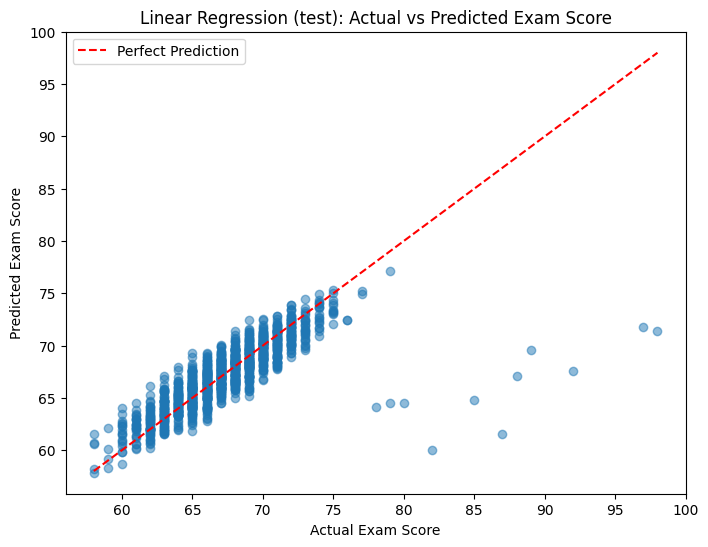

Linear Regression test RMSE: 2.3971


In [31]:
linear_training_prediction = linear_model.predict(X_test)
linear_training_rmse = np.sqrt(mean_squared_error(y_test, linear_training_prediction))

linear_y_pred = linear_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, linear_y_pred, alpha=0.5)
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Linear Regression (test): Actual vs Predicted Exam Score')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')

plt.legend()
plt.show()
print(f"Linear Regression test RMSE: {np.sqrt(mean_squared_error(y_test, linear_y_pred)):.4f}")

